# Wikidata predicate distribution analysis

In this notebook we'll analyse how wikidata properties are distributed. We will try to investigate the property distribution of some towns and possibly other entities

In [1]:
from tools.datasets import *

glasgow_truthy_dict = fetch_dataset("Q4093", provider="wikidata", flavor="simple")

Dataset Q4093.json already downloaded. Skipping...


In [2]:
predicates = glasgow_truthy_dict["entities"]["Q4093"]["claims"]

print(predicates.keys())

dict_keys(['P190', 'P131', 'P373', 'P227', 'P17', 'P94', 'P281', 'P421', 'P473', 'P300', 'P625', 'P31', 'P613', 'P910', 'P948', 'P982', 'P646', 'P1082', 'P901', 'P1036', 'P856', 'P1464', 'P1465', 'P1566', 'P1740', 'P1792', 'P605', 'P206', 'P935', 'P214', 'P47', 'P1997', 'P2633', 'P1281', 'P242', 'P2046', 'P1343', 'P1255', 'P268', 'P906', 'P998', 'P2468', 'P1617', 'P3616', 'P3120', 'P3417', 'P2347', 'P1225', 'P3219', 'P4527', 'P1549', 'P6', 'P2716', 'P1889', 'P5573', 'P949', 'P4672', 'P1151', 'P1667', 'P18', 'P1830', 'P1376', 'P244', 'P1705', 'P1448', 'P2936', 'P1296', 'P691', 'P6766', 'P6849', 'P7350', 'P836', 'P7867', 'P7818', 'P7829', 'P7827', 'P7832', 'P7859', 'P7959', 'P1417', 'P6404'])


In [3]:


def get_edges(entity_df, entities_only=True):
    """Generate triples: [<subject>, <predicate>, <object>].
        Only consider objects for which there is a linked entity
        
        If entities_only is True, consider the triples where the objects are wikidata entities.
    """
    
    root = entity_df["entities"]
    subjects = list(entity_df["entities"].keys())
    
    predicates = [(subject, claim, root[subject]["claims"][claim]) for subject in subjects for claim in root[subject]["claims"]]

    tuples = []
    
    for (subject, claim, snaks) in predicates:
        for snak in snaks:
            mainsnak = snak["mainsnak"]
            if mainsnak["snaktype"] == "value":
                datavalue = mainsnak["datavalue"]
                datavalue_value = datavalue["value"]
                datavalue_type = datavalue["type"]     
                
                if datavalue_type == "wikibase-entityid":
                    obj_to_append = datavalue_value["id"]
                elif entities_only:
                    continue
                elif datavalue_type == "string":
                    obj_to_append = datavalue_value
                else:
                    obj_to_append = None
                
                if obj_to_append:
                    tuples.append((subject, claim, obj_to_append))
            else:
                print("snaktype != value", mainsnak["snaktype"])
            
    
    return tuples

edges = get_edges(glasgow_truthy_dict)
for edge in edges:
    print(edge)

('Q4093', 'P190', 'Q5776')
('Q4093', 'P190', 'Q2090')
('Q4093', 'P190', 'Q23482')
('Q4093', 'P190', 'Q908')
('Q4093', 'P190', 'Q495')
('Q4093', 'P190', 'Q1563')
('Q4093', 'P190', 'Q11739')
('Q4093', 'P190', 'Q216479')
('Q4093', 'P131', 'Q55934339')
('Q4093', 'P131', 'Q68826097')
('Q4093', 'P131', 'Q77606319')
('Q4093', 'P131', 'Q77607750')
('Q4093', 'P17', 'Q145')
('Q4093', 'P17', 'Q174193')
('Q4093', 'P17', 'Q161885')
('Q4093', 'P17', 'Q230791')
('Q4093', 'P421', 'Q6574')
('Q4093', 'P31', 'Q515')
('Q4093', 'P31', 'Q1549591')
('Q4093', 'P910', 'Q6789903')
('Q4093', 'P1464', 'Q8050662')
('Q4093', 'P1465', 'Q9218504')
('Q4093', 'P1740', 'Q8458102')
('Q4093', 'P1792', 'Q6791290')
('Q4093', 'P206', 'Q19721')
('Q4093', 'P206', 'Q183161')
('Q4093', 'P47', 'Q2746326')
('Q4093', 'P47', 'Q209142')
('Q4093', 'P2633', 'Q5535147')
('Q4093', 'P1343', 'Q4114391')
('Q4093', 'P1343', 'Q4173137')
('Q4093', 'P1343', 'Q19180675')
('Q4093', 'P1343', 'Q602358')
('Q4093', 'P6', 'Q29973504')
('Q4093', 'P1889

In [4]:
results_df = wikidata_sparql.run_query("""
SELECT ?label
WHERE
{
    wd:Q4093 rdfs:label ?label.
    FILTER(LANG(?label) = "en").
}
""")

In [5]:
results_df[['label.value']].head()

,label.value
0,Glasgow


In [6]:
# let's generalize
annotate_wikidata_property(["P6", "P10"])


,property.type,property.value,propertyLabel.xml:lang,propertyLabel.type,propertyLabel.value
0,uri,http://www.wikidata.org/entity/P6,en,literal,head of government
1,uri,http://www.wikidata.org/entity/P10,en,literal,video


In [7]:
import pandas as pd
edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])

In [8]:
edges_df.groupby("predicate")["object"].count().to_dict()

{'P1151': 1,
 'P131': 4,
 'P1343': 4,
 'P1376': 3,
 'P1464': 1,
 'P1465': 1,
 'P17': 4,
 'P1740': 1,
 'P1792': 1,
 'P1830': 2,
 'P1889': 1,
 'P190': 8,
 'P206': 2,
 'P2633': 1,
 'P2936': 1,
 'P31': 2,
 'P421': 1,
 'P47': 2,
 'P6': 1,
 'P7867': 1,
 'P7959': 3,
 'P910': 1}

In [9]:
property_list = edges_df["predicate"].unique()
properties = annotate_wikidata_property(property_list)

In [10]:
properties["predicate"] = properties["property.value"].str[len("http://www.wikidata.org/entity/"):]

In [11]:
annotated_edges = edges_df.merge(properties, left_on="predicate", right_on="predicate")

annotated_edges[["subject", "predicate", "propertyLabel.value"]]

,subject,predicate,propertyLabel.value
0,Q4093,P190,twinned administrative body
1,Q4093,P190,twinned administrative body
2,Q4093,P190,twinned administrative body
3,Q4093,P190,twinned administrative body
4,Q4093,P190,twinned administrative body
5,Q4093,P190,twinned administrative body
6,Q4093,P190,twinned administrative body
7,Q4093,P190,twinned administrative body
8,Q4093,P131,located in the administrative territorial entity
9,Q4093,P131,located in the administrative territorial entity


In [12]:
annotated_edges[["propertyLabel.value", "object"]].groupby("propertyLabel.value").count().to_dict()["object"]

{'capital of': 3,
 'category for films shot at this location': 1,
 'category for maps': 1,
 'category for people born here': 1,
 'category for people who died here': 1,
 'category of associated people': 1,
 'country': 4,
 'described by source': 4,
 'different from': 1,
 'geography of topic': 1,
 'head of government': 1,
 'historic county': 3,
 'instance of': 2,
 'language used': 1,
 'located in or next to body of water': 2,
 'located in the administrative territorial entity': 4,
 'located in time zone': 1,
 'owner of': 2,
 'shares border with': 2,
 "topic's main Wikimedia portal": 1,
 "topic's main category": 1,
 'twinned administrative body': 8}

In [16]:
glasgow_property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')
print(glasgow_property_distribution)

subject  predicate  propertyLabel.value                             
Q4093    P1151      topic's main Wikimedia portal                       1
         P131       located in the administrative territorial entity    4
         P1343      described by source                                 4
         P1376      capital of                                          3
         P1464      category for people born here                       1
         P1465      category for people who died here                   1
         P17        country                                             4
         P1740      category for films shot at this location            1
         P1792      category of associated people                       1
         P1830      owner of                                            2
         P1889      different from                                      1
         P190       twinned administrative body                         8
         P206       located in or next to b

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc4e3effd0>],
      dtype=object)

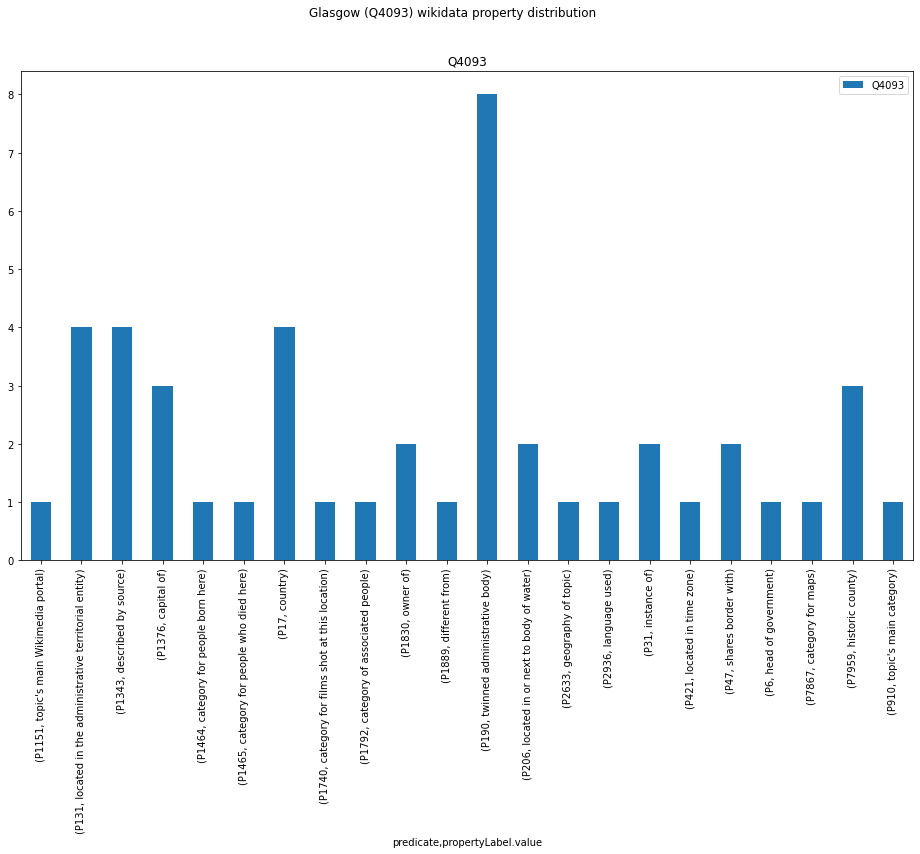

In [17]:
glasgow_property_distribution.unstack(level=0).plot(kind='bar', subplots=True, title="Glasgow (Q4093) wikidata property distribution", figsize=(16, 9))

In [18]:
def strip_prefix(prefix, string):
    if string.startswith(prefix):
        return string[len(prefix):]
    return string

def find_wikidata_entity(entity_str):
    query = """SELECT ?entity
    WHERE
    {
        ?entity rdfs:label "?entity_str"@en.
    }
    
    LIMIT 1
    """.replace("?entity_str", entity_str)
    
    result = wikidata_sparql.run_query(query)["entity.value"][0]
    
    return strip_prefix("http://www.wikidata.org/entity/", result)

find_wikidata_entity("Glasgow")

'Q4093'

In [19]:
find_wikidata_entity("Philadelphia")

'Q1345'

In [20]:
def get_entities_distribution(entities):
    # Merge the edge lists for each entity dataframe
    wikidata_truthy_dfs = [fetch_dataset(entity, provider="wikidata", flavor="simple") for entity in entities]
    edges_list = [get_edges(df) for df in wikidata_truthy_dfs]
    edges = [edge for edges in edges_list for edge in edges]
    edges_df = pd.DataFrame(edges, columns=["subject", "predicate", "object"])
    
    # Annotate the properties
    property_list = edges_df["predicate"].unique()
    annotated_properties = annotate_wikidata_property(property_list)
    
    # Merge edge list and annotations.
    annotated_properties["predicate"] = annotated_properties["property.value"].str[len("http://www.wikidata.org/entity/"):]
    annotated_edges = edges_df.merge(annotated_properties, left_on="predicate", right_on="predicate")
    
    # Count duplicate s-o pairs
    property_distribution = annotated_edges.pivot_table(index=['subject', 'predicate', 'propertyLabel.value'], aggfunc='size')
    
    for key, val in property_distribution.unstack(level=0).to_dict().items():
        print(key)
        print(val)
    
    return property_distribution

def plot_distribution(property_distribution):
    property_distribution.unstack(level=0).plot(kind='bar', subplots=False, figsize=(30, 9))

Dataset Q4093.json already downloaded. Skipping...
Dataset Q1345.json already downloaded. Skipping...
Dataset Q2656.json already downloaded. Skipping...
Q1345
{('P112', 'founded by'): 1.0, ('P1151', "topic's main Wikimedia portal"): 1.0, ('P131', 'located in the administrative territorial entity'): 1.0, ('P1313', 'office held by head of government'): nan, ('P1343', 'described by source'): 1.0, ('P1376', 'capital of'): 2.0, ('P1464', 'category for people born here'): 1.0, ('P1465', 'category for people who died here'): 1.0, ('P150', 'contains administrative territorial entity'): nan, ('P163', 'flag'): 1.0, ('P166', 'award received'): 1.0, ('P17', 'country'): 1.0, ('P1740', 'category for films shot at this location'): 1.0, ('P1791', 'category of people buried here'): 1.0, ('P1792', 'category of associated people'): 1.0, ('P1830', 'owner of'): 1.0, ('P1889', 'different from'): 1.0, ('P190', 'twinned administrative body'): 13.0, ('P194', 'legislative body'): nan, ('P206', 'located in or ne

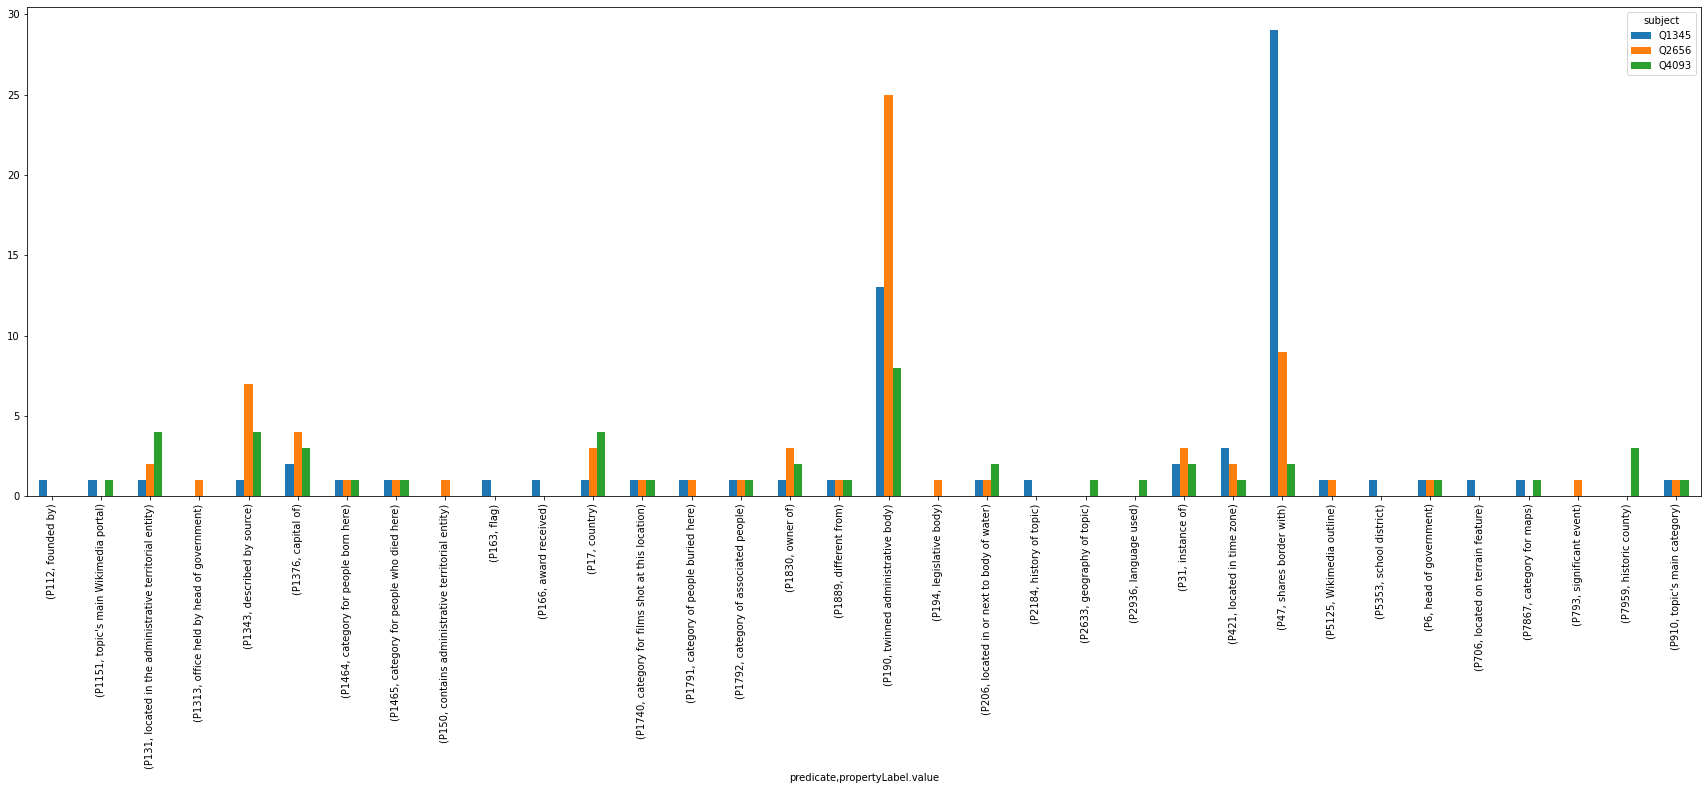

In [21]:
towns = ["Glasgow", "Philadelphia", "Palermo"]
town_entities = [find_wikidata_entity(town) for town in towns]

plot_distribution(get_entities_distribution(town_entities))

## Improved query system

We need to test against words that may have multiple meanings and thus require entity linking.

Here we'll use the pre-trained word2vec model with max-pooling to find the most related results.

In [22]:
#!pip install spacy
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [61]:
!pip install -U sentence-transformers

     |████████████████████████████████| 60 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 674 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 753.2 MB 14 kB/s s eta 0:00:01    |███▌                            | 83.5 MB 13.7 MB/s eta 0:00:49     |███████▍                        | 173.8 MB 12.2 MB/s eta 0:00:48     |████████▏                       | 191.1 MB 12.2 MB/s eta 0:00:47     |█████████████▋                  | 319.2 MB 13.3 MB/s eta 0:00:33     |██████████████▌                 | 341.0 MB 7.2 MB/s eta 0:00:58     |██████████████▌                 | 341.8 MB 7.2 MB/s eta 0:00:58     |██████████████▋                 | 343.2 MB 6.3 MB/s eta 0:01:06     |██████████████▉                 | 349.4 MB 6.3 MB/s eta 0:01:05     |███████████████                 | 351.4 MB 6.3 MB/s eta 0:01:05     |███████████████▏                | 356.0 MB 6.3 MB/s eta 0:01:04     |███████████████▎                | 359.6 MB 20.6 MB/s eta 0:00:20     |████████████████▎          

In [80]:
from sentence_transformers import SentenceTransformer
from scipy.spatial import distance

model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences = ["city in Scotland", "town in Montana", "Scottish parish", "Amtrak station in Glasgow, Montana, United States of America", ""]

sentence_embeddings = model.encode(sentences)
query = model.encode(["Scottish city"])

for embedding in sentence_embeddings:
    print(1 - distance.cosine(embedding, query))

0.9366812705993652
0.48034125566482544
0.8854820132255554
0.4521092176437378
0.5092676877975464


In [78]:
query = model.encode(["church"])

for embedding in sentence_embeddings:
    print(1 - distance.cosine(embedding, query))

0.4166299104690552
0.3467281460762024
0.48753607273101807


In [168]:
def find_all_results(label):
    query = """
    SELECT ?entity ?entityDescription
    WHERE
    {
        ?entity rdfs:label "?label"@en.
        SERVICE wikibase:label
        {
            bd:serviceParam wikibase:language "en" .
        }
    }
    """.replace("?label", label)
    
    return wikidata_sparql.run_query(query)

def find_most_related_entity(label, description):
    results = find_all_results(label)
    result_list = np.append(results["entityDescription.value"].to_numpy(na_value=""), description)
    embeddings = model.encode(result_list)
    embeddings_np = np.array((embeddings))
    embeddings_normalized = embeddings_np / np.linalg.norm(embeddings, axis=1).reshape(-1, 1)
    
    # perform cosine similarity between query and all the given descriptions, filter out the query itself
    correlation_scores = embeddings_normalized[-1].dot(embeddings_normalized.T)[:-1]
    
    preferred = np.argmax(correlation_scores)
    return strip_prefix("http://www.wikidata.org/entity/", results.iloc[preferred]["entity.value"])
    

In [172]:
family_household = find_most_related_entity("family", "people in the same household")

In [176]:
family_botanical = find_most_related_entity("family", "Botanical or animal taxonomy")

In [177]:
family_distribution = get_entities_distribution([family_household, family_botanical])

Dataset Q8436.json already downloaded. Skipping...
Dataset Q35409.json not available, downloading from https://wikidata.org/wiki/Special:EntityData/Q35409.json?flavor=simple
Done
Q35409
{('P1343', 'described by source'): 2.0, ('P1424', "topic's main template"): nan, ('P1542', 'has effect'): nan, ('P1552', 'has quality'): nan, ('P1687', 'Wikidata property'): nan, ('P1889', 'different from'): 3.0, ('P279', 'subclass of'): nan, ('P31', 'instance of'): 3.0, ('P361', 'part of'): 5.0, ('P5008', 'on focus list of Wikimedia project'): nan, ('P527', 'has part'): nan, ('P910', "topic's main category"): 1.0}
Q8436
{('P1343', 'described by source'): 6.0, ('P1424', "topic's main template"): 2.0, ('P1542', 'has effect'): 1.0, ('P1552', 'has quality'): 2.0, ('P1687', 'Wikidata property'): 2.0, ('P1889', 'different from'): 1.0, ('P279', 'subclass of'): 4.0, ('P31', 'instance of'): nan, ('P361', 'part of'): nan, ('P5008', 'on focus list of Wikimedia project'): 2.0, ('P527', 'has part'): 4.0, ('P910', "

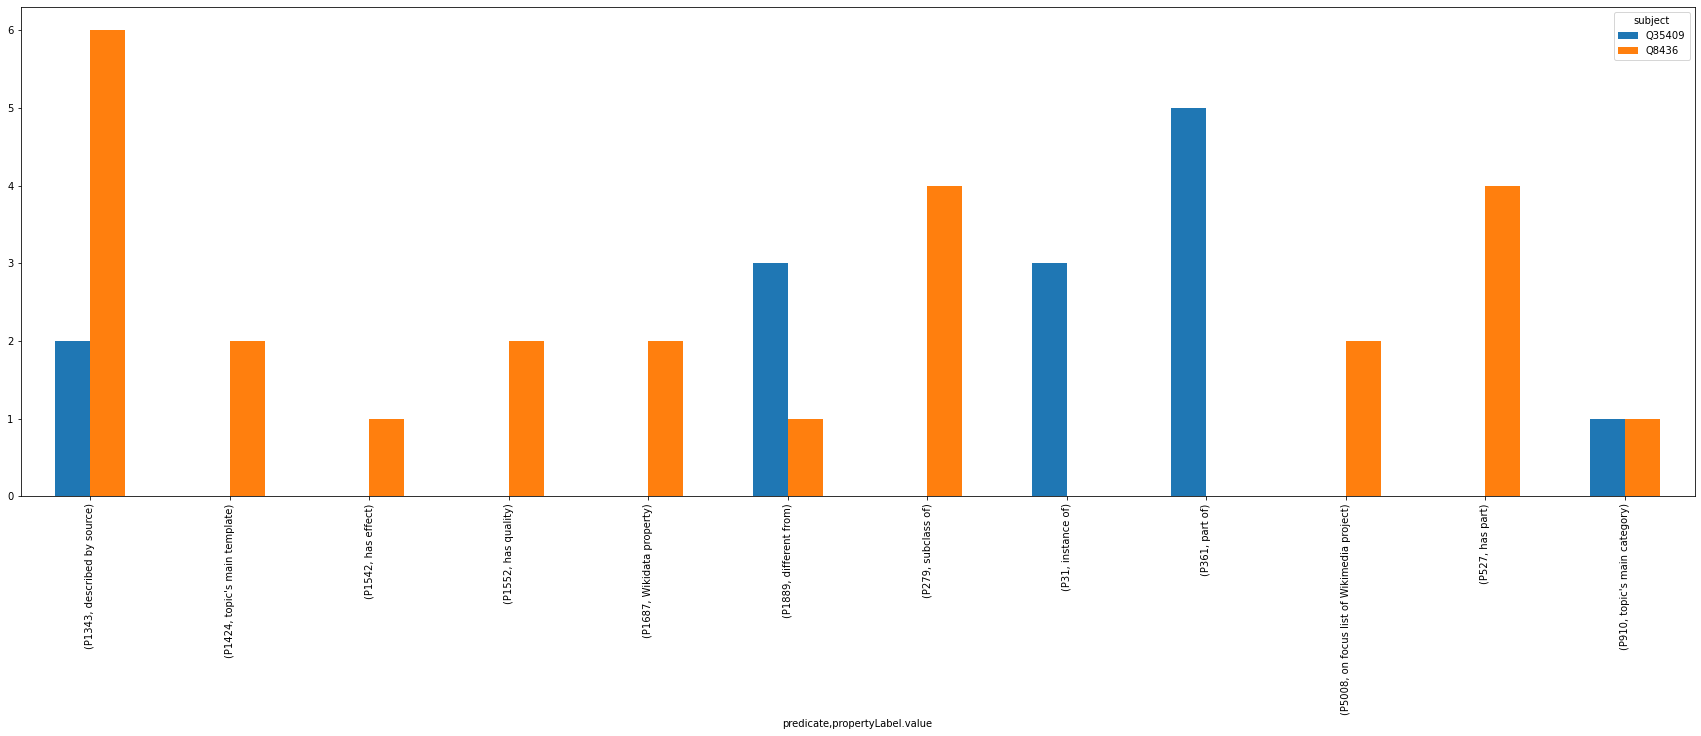

In [179]:
plot_distribution(family_distribution)